Exercise 5.12: Racetrack (programming) Consider driving a race car around a turn
like those shown in Figure 5.5. You want to go as fast as possible, but not so fast as
to run o↵ the track. In our simplified racetrack, the car is at one of a discrete set of
grid positions, the cells in the diagram. The velocity is also discrete, a number of grid
cells moved horizontally and vertically per time step. The actions are increments to the
velocity components. Each may be changed by +1, 1, or 0 in each step, for a total of
nine (3 ⇥ 3) actions. Both velocity components are restricted to be nonnegative and less
than 5, and they cannot both be zero except at the starting line. Each episode begins
in one of the randomly selected start states with both velocity components zero and
ends when the car crosses the finish line. The rewards are 1 for each step until the car
crosses the finish line. If the car hits the track boundary, it is moved back to a random
position on the starting line, both velocity components are reduced to zero, and the
112 Chapter 5: Monte Carlo Methods
Starting line
Finish
line
Starting line
Finish
line
Figure 5.5: A couple of right turns for the racetrack task.
episode continues. Before updating the car’s location at each time step, check to see if
the projected path of the car intersects the track boundary. If it intersects the finish line,
the episode ends; if it intersects anywhere else, the car is considered to have hit the track
boundary and is sent back to the starting line. To make the task more challenging, with
probability 0.1 at each time step the velocity increments are both zero, independently of
the intended increments. Apply a Monte Carlo control method to this task to compute
the optimal policy from each starting state. Exhibit several trajectories following the
optimal policy (but turn the noise o↵ for these trajectories).

So we start with an arbitrary grid where the car can run on. 

For simplicity, let's consider the bottom-most row of our grid to be the x = 0 coordinates. Because we can only move to the right or upwards, for any starting position the possible grids exist either up or to the right of (0, 0). That is, we are living the quadrant I of the coordinate axis.


The finish line can be a range of x values (x1, ..., xn) all at one value of y which is greater than the rightmost value of the starting line. Let's consider it to be this way for simplicity. 


Let's make a random grid generator which fits into this, and get a crude visualization of it. 

In [1909]:
import numpy as np 
import sys
import pandas as pd

In [1910]:
np.set_printoptions(threshold=sys.maxsize)

In [1911]:
[0] * -1

[]

In [1912]:
def create_function_vertical(i, rand_len, full_len, height):
    center = full_len / 2
    a = (3/8) * full_len
    f = center + a * np.sin(i/2) - 2 * (i/height)
    start = max(0, f - rand_len/2)
    return int(start)
    

In [1913]:
import numpy as np
import sys 

np.set_printoptions(threshold=sys.maxsize)

def random_grid_generator(len_start=1000, right_most_end=1000, height=100, 
                          min_size=None, min_finish_height=None):
    hardn_right = np.random.randint(1, right_most_end)
    n_starts = np.random.randint(1, len_start) 
    base = [1] * n_starts 
    bottom_line = base + [0] * hardn_right
    full_len = len(bottom_line)
    # we are allowing plenty of variation here...
    
    if min_size is None:
        min_size= full_len / 1.5
        
    if min_finish_height is None:
        min_finish_height = (1/4) * height
    
    grid = [bottom_line]
    for i in range(height):
        rand_len = np.random.randint(min_size, full_len)
        start = create_function_vertical(i, rand_len, full_len, height)
        new_line = [0] * start + [1] * min(rand_len, full_len - start) + [0] * max(0, full_len - rand_len - start) 
        grid.append(new_line)
    
    grid = np.array(grid)
    finish_height = np.random.randint(0, min_finish_height)

    eligible_xs = np.where(grid[finish_height, :] == 1)[0]
    finish_x = np.max(eligible_xs)
    grid[finish_height, finish_x] = 2
    
    
    
    

    return  np.flip(grid, axis=0)

In [1941]:
racetrack = random_grid_generator(34, 50, 42)

In [1942]:
racetrack

array([[0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1,

In [1943]:
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Rectangle

In [1944]:
from IPython.display import HTML


In [1945]:
%matplotlib inline

In [1946]:
import seaborn as sns

In [1947]:
np.linalg.det

<function numpy.linalg.det(a)>

In [1948]:
np.flip(np.array([[1,2],[3,4]]).T)[[1,1], [0, 1]]

array([3, 1])

In [1949]:
check_intersect_two_linesegments((1,0), (3,3), (2,4), (4,3))

False

In [1950]:
def create_triangle_array(x_value, y_value, velocity_x, velocity_y, x_scale=1, y_scale=1):
    x = (x_value * x_scale) - x_scale / 2
    y = (y_value * y_scale) - x_scale /2
    start = np.array([[x , y], [x, y + y_scale], [x + x_scale, y + y_scale / 2]])
    cog = np.array([x + x_scale/ 2, y + y_scale/ 2])
    transf_to_origin = (start - cog)
    

    slope = np.divide(velocity_y, velocity_x) if ((velocity_x != 0) or (velocity_y != 0)) else 0
    angle = np.arctan(slope) 
    rot_mat = np.array([[np.cos(angle), -np.sin(angle)], 
                        [np.sin(angle), np.cos(angle)]])

    rotated = np.matmul(rot_mat, transf_to_origin.T).T

    


    final = (rotated + cog)
    return(final)

In [1951]:
def create_fill_betweens(racetrack, value, x_transf, y_transf):
    x1_list = []
    x2_list = []
    y_list = []
    
    for i in range(len(racetrack)):
        xs = np.where(racetrack[i, :] == 1)[0]
        mn, mx = np.min(xs), np.max(xs)
          
        y_list.append(i * y_transf)
        x1_list.append(mn * x_transf)
        x2_list.append(mx * x_transf)

    return y_list, x1_list, x2_list

In [1952]:
def determine_transformation_size(racetrack):
    flipped = np.flip(racetrack, axis=0)
    # Draw the borders of the court
    x_size, y_size = racetrack.T.shape
    
    x_transf = x_size / flipped.T.shape[0]
    y_transf = y_size / flipped.T.shape[1]
    return x_transf, y_transf

1.0 1.0
(array([36]), array([7]))
X GOAL:(7.0, 36.0)


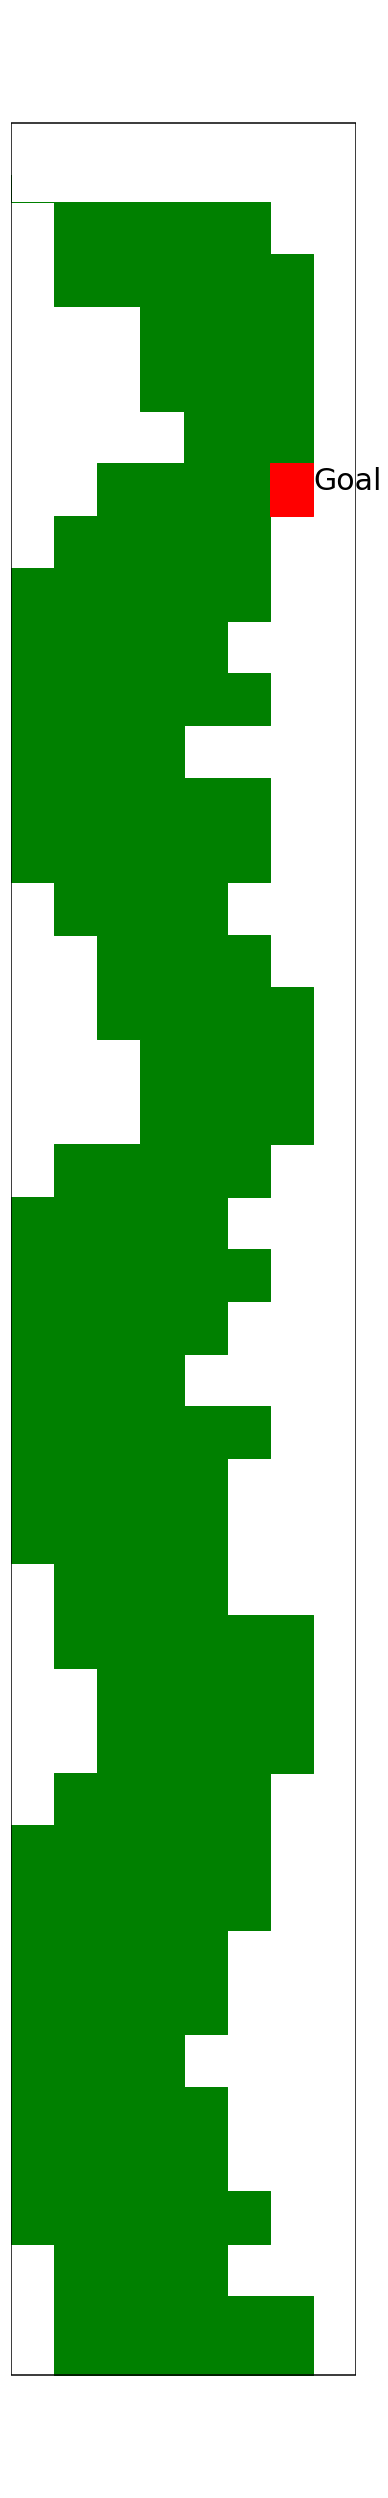

In [1953]:
def create_pretty_plot(racetrack, x, y, vel_x, vel_y):
    fig = plt.figure(figsize=racetrack.T.shape)
    ax = fig.add_axes([.2, .1, .6, .8], frame_on=False, 
                       xticks=[], yticks=[])
    flipped = np.flip(racetrack, axis=0)
    x_size, y_size = racetrack.T.shape
    x_transf, y_transf = determine_transformation_size(racetrack)
    
    ax.set_xlim(0, x_size)
    ax.vlines([0, x_size], 0, y_size)
    ax.hlines([0, y_size], 0, x_size)

    # Add the three point arc, free throw circle, 
    # midcourt circle and backboard and rim
    
    # This is the raceca
    
#     triangle = create_triangle_array(x, y, vel_x, vel_y, x_transf, y_transf)
    y, x1, x2 = create_fill_betweens(racetrack, 1, 1, 1)

    ax.fill_betweenx(y, x1, x2, color='green', step='mid')
    
    goal = np.where(racetrack == 2)
    y_goal, x_goal = goal[0][0] * y_transf, goal[1][0] * x_transf
    
    
#     ax.add_patch(Polygon(triangle, color='yellow'))

    print(x_transf, y_transf)
    print(goal)
    finish_square = x_goal - x_transf, y_goal - y_transf / 2
    square = Rectangle(finish_square, y_transf, x_transf, color='red')
    ax.add_patch(square)
    ax.text(x_goal, y_goal, "Goal", fontsize=30, label='description')
    print(f'X GOAL:{x_goal, y_goal}')
    return fig, ax
fig, ax = create_pretty_plot(racetrack, 0, 0, 1, 2)
    

In [1954]:
pd.DataFrame(racetrack)

,0,1,2,3,4,5,6,7
0,0,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1
2,0,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,0
4,1,1,1,1,1,1,0,0
5,1,1,1,1,1,1,0,0
6,1,1,1,1,1,0,0,0
7,1,1,1,1,1,1,0,0
8,1,1,1,1,1,1,0,0
9,1,1,1,1,1,1,1,0


In [2056]:
def action(current_velocity, inc_up, inc_right):
    unif = np.random.uniform()
    if unif > .1:
        new_velocity = current_velocity[0] + inc_up, current_velocity[1] + inc_right
    else:
        new_velocity = current_velocity
        
    return new_velocity
    

def move_car(racetrack, current_position, vel_up, vel_right):
    new_position = current_position[0] + vel_up, current_position[1] + vel_right
    
    finish_line_x, finish_line_y = np.where(racetrack == 2)
    
    test_finish = determine_if_crossed(current_position, vel_up, vel_right, finish_line_x, finish_line_y)
    if test_finish:
        return (finish_line_x[0], finish_line_y[0]), 0, 0
    
    out_of_grid = (new_position[0] >= racetrack.shape[0]) or (new_position[1] >= racetrack.shape[1])
    if not out_of_grid:
        nearby_oobs = np.where((racetrack[current_position[0]:new_position[0], 
                                          current_position[1]:new_position[1]] == 0))
        nearby_oobs = list(zip(current_position[0] + nearby_oobs[0],
                               current_position[1] + nearby_oobs[1]))
        
        if current_position[0] == 32:
            import pdb; pdb.set_trace
        oob = any([determine_intersect_area(current_position, vel_up, vel_right, o[0], o[1]) 
                   if len(nearby_oobs) != 0 else False for o in nearby_oobs])


        oob = oob or (racetrack[new_position] == 0)
    else:
        oob = True   
    
    if oob:
        # choose randomly from starting positions 
        start_line_poss = np.where(racetrack[0, :] == 1)[0]
        rand_start = np.random.choice(start_line_poss)
        new_position = (0, rand_start)
        vel_up = vel_right = 0
    return new_position, vel_up, vel_right
        

In [2042]:
from itertools import product

In [2043]:

def remove_if_bound(l, v, min_, max_):
    if v == min_:
        l.remove(-1)
    elif v == max_:
        l.remove(1)
    
    return l

def select_possible_action(vel_up, vel_right, min_v=0, max_v=5, policy=None, epsilon=.1, curr_pos=None):
    rand = np.random.uniform()
    if policy is not None:
        rand = np.random.uniform()
        if rand < epsilon:
            pass
        else: 
             return policy[curr_pos, (vel_up, vel_right)]
    
    pos_actions = actions_from_state(((1, 1), (vel_up, vel_right)), min_v, max_v)
        
            
    
    return pos_actions[np.random.choice(range(len(pos_actions)))]    

def determine_intersect_area(start_pos, vel_up, vel_right, x, y):

    line_segments = [[(x - 1/2, y - 1/2), (x - 1/2, y + 1/2)],
                     [(x - 1/2, y - 1/2), (x + 1/2, y - 1/2)],
                     [(x - 1/2, y + 1/2), (x + 1/2, y + 1/2)],
                     [(x + 1/2, y - 1/2), (x + 1/2, y + 1/2)]]
    
    move_seg = [(start_pos[0], start_pos[1]), (start_pos[0] + vel_up, start_pos[1] + vel_right)]
    
    crossed = any(
        check_intersect_two_linesegments(line_seg[0], line_seg[1],
                                         move_seg[0], move_seg[1]) 
        for line_seg in line_segments)
    
    return crossed

def determine_if_crossed(start_pos, vel_up, vel_right, finish_line_x, finish_line_y):
    if start_pos == (finish_line_x[0], finish_line_y[0]):
        return True
    
    if (vel_right == 0):
        far_enough_up = (start_pos[0] + vel_up) >= finish_line_x[0]
        right_row = finish_line_y[0] == start_pos[1]
        return far_enough_up & right_row
    elif (vel_up == 0):
        far_enough_right = (start_pos[1] + vel_right) >= finish_line_y[0]
        right_col = finish_line_x[0] == start_pos[0]
        return far_enough_right & right_col
    
    # Assume that if the line crosses the grid square it has crossed the finish line
    slope_of_next_move = vel_right/vel_up
    
    crossed = determine_intersect_area(start_pos, vel_up, vel_right, finish_line_x[0], finish_line_y[0])

    return crossed
    
        

def random_experiment(racetrack, p_a=1/9, policy=None, epsilon=.1):

    possible_actions = [(x, y) for x, y in product([-1, 0, 1], [-1, 0, 1])]
    finish_line_x, finish_line_y = np.where(racetrack == 2)
    
    start_line_poss = np.where(racetrack[0, :] == 1)[0]
    rand_start = np.random.choice(start_line_poss)
    pos = [(0, rand_start)]
    vel = [(0, 0)]
    act = []
    reward = []
    while not determine_if_crossed(pos[-1], vel[-1][0], vel[-1][1], finish_line_x, finish_line_y):
        if len(act) > 0:
            reward.append(-1)
        curr_pos = pos[-1]
        curr_vel = vel[-1]
        

        inc_up, inc_right = select_possible_action(curr_vel[0], curr_vel[1], 
                                                   policy=policy, epsilon=epsilon, 
                                                   curr_pos=curr_pos)
   
        
        
        act.append((inc_up, inc_right))

        vel_up, vel_right = action(curr_vel, inc_up, inc_right)

        new_pos, vel_up, vel_right = move_car(racetrack, curr_pos, vel_up, vel_right)
            
        pos.append(new_pos)
        vel.append((vel_up, vel_right))
    reward.append(0)
    
    ret =  {
        'state': [(x, y) for x, y in zip(pos[:-1], vel[:-1])],
        'actions': act, 
        'rewards': reward
    }
    
    return ret




In [2044]:
def check_intersect_two_linesegments(x_start, x_end, y_start, y_end):
    left_vector = np.array(x_start) - np.array(y_start)
    y_to = np.array(y_end) - np.array(y_start)
    x_to = np.array(x_end) - np.array(x_start)
    
    zero_vec = np.zeros(2)
    one_vec = np.ones(2)
    
    if (left_vector == zero_vec).all():
        #Then they intersect at start point
        return True
    
    right_matrix = np.array([y_to, x_to]).T
    
    det = np.linalg.det(right_matrix)
    if det == 0:
        # Then the two lines are parallel )
        return False 
    flipped = np.flip(right_matrix).T
    flipped[[0, 1], [1, 0]] = - flipped[[0, 1], [1, 0]]
    inv = (1/ det) * (flipped)

    s_t = np.matmul(inv, left_vector)
    s_t[1] = - s_t[1]
    
    return (s_t >= zero_vec).all() & (s_t <= one_vec).all()
    
    

In [2045]:
def actions_from_state(loc_vel_tuple, min_v=0, max_v=5):
    vel_up, vel_right = loc_vel_tuple[1]
    l1 = remove_if_bound([-1, 0, 1], vel_up, min_v, max_v)
    l2 = remove_if_bound([-1, 0, 1], vel_right, min_v, max_v)
    pos_actions = [(x, y) for x, y in product(l1, l2) if (vel_up + x, vel_right + y) != (0, 0)]
    return pos_actions

actions_from_loc = actions_from_state

def generate_state_space(racetrack, min_v=0, max_v=5):
    loc_x, loc_y = np.where((racetrack == 1) | (racetrack == 2))
    locations = [(x, y) for x, y in zip(loc_x, loc_y)]
    velocities = [(x, y) for x, y in product(range(min_v, max_v + 1), range(min_v, max_v + 1))]
    
    return  [(x, y) for x, y in product(locations, velocities)]

In [2046]:
np.where(racetrack == 1)

(array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,
         5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,
         8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
        13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16,
        16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19,
        19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
        22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24,
        25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
        28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30,
        30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33,
        33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36,
        36, 

In [2047]:
idx = np.where(racetrack == 1)

In [2048]:
list(zip(idx[0], idx[1]))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (11, 1),
 (11, 2),
 (11, 3),
 (11, 4),
 (11, 5),
 (11, 6),
 (12, 2),
 (12, 3),
 (12, 4),
 (12, 5),
 (12, 6),
 (12, 7),
 (13, 2),
 (13, 3),
 (13, 4),
 (13, 5),
 (13, 6),
 (13, 7),
 (14, 1),
 (14, 2),
 (14, 3),
 (14, 4),
 (14, 5),
 (14, 6),
 (14, 7),
 (15, 1),
 (15, 2),
 (15, 3),
 (15, 4),
 (15, 5),
 (16, 0),
 (16, 1),
 (16, 2),
 (16, 3),
 (16, 4),
 (16, 5),
 (17, 0),
 (

In [2049]:
idx[0]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16,
       16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21,
       22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24,
       25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30,
       30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33,
       33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36,
       36, 36, 36, 37, 37

In [2050]:
policy

(0, 1)   (0, 0)      (1, 0)
         (0, 1)     (1, -1)
         (0, 2)      (0, 0)
         (0, 3)     (0, -1)
         (0, 4)      (0, 1)
         (0, 5)     (1, -1)
         (1, 0)      (0, 1)
         (1, 1)     (0, -1)
         (1, 2)     (-1, 1)
         (1, 3)      (0, 1)
         (1, 4)     (0, -1)
         (1, 5)     (1, -1)
         (2, 0)      (1, 0)
         (2, 1)     (1, -1)
         (2, 2)      (0, 0)
         (2, 3)     (0, -1)
         (2, 4)      (0, 1)
         (2, 5)      (1, 0)
         (3, 0)      (0, 1)
         (3, 1)     (-1, 0)
         (3, 2)      (1, 0)
         (3, 3)     (-1, 0)
         (3, 4)      (1, 1)
         (3, 5)     (0, -1)
         (4, 0)      (1, 1)
         (4, 1)     (-1, 1)
         (4, 2)    (-1, -1)
         (4, 3)      (0, 1)
         (4, 4)      (1, 0)
         (4, 5)     (0, -1)
                     ...   
(42, 0)  (1, 0)     (-1, 1)
         (1, 1)     (-1, 0)
         (1, 2)      (1, 1)
         (1, 3)      (0, 0)
         (1, 4)     

In [2051]:
racetrack[(0, 16)]

IndexError: index 16 is out of bounds for axis 1 with size 8

In [2057]:
for i in range(100):
    res = random_experiment(racetrack)

In [2058]:
determine_if_crossed((20, 18), 2, 0, [21], [18])

True

In [1968]:
np.where(racetrack == 2)

(array([36]), array([7]))

In [1969]:
res['state']

[((0, 1), (0, 0)),
 ((1, 2), (1, 1)),
 ((3, 4), (2, 2)),
 ((5, 5), (2, 1)),
 ((0, 1), (0, 0)),
 ((1, 1), (1, 0)),
 ((3, 2), (2, 1)),
 ((5, 4), (2, 2)),
 ((0, 7), (0, 0)),
 ((0, 1), (0, 0)),
 ((1, 2), (1, 1)),
 ((2, 2), (1, 0)),
 ((3, 2), (1, 0)),
 ((4, 2), (1, 0)),
 ((6, 2), (2, 0)),
 ((8, 2), (2, 0)),
 ((9, 3), (1, 1)),
 ((10, 5), (1, 2)),
 ((12, 6), (2, 1)),
 ((0, 7), (0, 0)),
 ((0, 3), (0, 0)),
 ((0, 4), (0, 1)),
 ((1, 6), (1, 2)),
 ((0, 6), (0, 0)),
 ((1, 6), (1, 0)),
 ((0, 4), (0, 0)),
 ((1, 5), (1, 1)),
 ((1, 7), (0, 2)),
 ((0, 7), (0, 0)),
 ((0, 6), (0, 0)),
 ((1, 6), (1, 0)),
 ((0, 7), (0, 0)),
 ((0, 2), (0, 0)),
 ((1, 3), (1, 1)),
 ((1, 4), (0, 1)),
 ((2, 4), (1, 0)),
 ((4, 5), (2, 1)),
 ((0, 7), (0, 0)),
 ((0, 7), (0, 0)),
 ((0, 7), (0, 0)),
 ((0, 7), (0, 0)),
 ((1, 7), (1, 0)),
 ((0, 3), (0, 0)),
 ((1, 3), (1, 0)),
 ((1, 4), (0, 1)),
 ((1, 5), (0, 1)),
 ((1, 6), (0, 1)),
 ((0, 2), (0, 0)),
 ((0, 3), (0, 1)),
 ((0, 4), (0, 1)),
 ((1, 4), (1, 0)),
 ((3, 5), (2, 1)),
 ((0, 2), 

In [1970]:
racetrack[(13, 7)]

1

In [1971]:
res['state'][-2]

((30, 5), (3, 1))

In [1972]:
racetrack

array([[0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1,

In [1973]:
res

{'state': [((0, 1), (0, 0)),
  ((1, 2), (1, 1)),
  ((3, 4), (2, 2)),
  ((5, 5), (2, 1)),
  ((0, 1), (0, 0)),
  ((1, 1), (1, 0)),
  ((3, 2), (2, 1)),
  ((5, 4), (2, 2)),
  ((0, 7), (0, 0)),
  ((0, 1), (0, 0)),
  ((1, 2), (1, 1)),
  ((2, 2), (1, 0)),
  ((3, 2), (1, 0)),
  ((4, 2), (1, 0)),
  ((6, 2), (2, 0)),
  ((8, 2), (2, 0)),
  ((9, 3), (1, 1)),
  ((10, 5), (1, 2)),
  ((12, 6), (2, 1)),
  ((0, 7), (0, 0)),
  ((0, 3), (0, 0)),
  ((0, 4), (0, 1)),
  ((1, 6), (1, 2)),
  ((0, 6), (0, 0)),
  ((1, 6), (1, 0)),
  ((0, 4), (0, 0)),
  ((1, 5), (1, 1)),
  ((1, 7), (0, 2)),
  ((0, 7), (0, 0)),
  ((0, 6), (0, 0)),
  ((1, 6), (1, 0)),
  ((0, 7), (0, 0)),
  ((0, 2), (0, 0)),
  ((1, 3), (1, 1)),
  ((1, 4), (0, 1)),
  ((2, 4), (1, 0)),
  ((4, 5), (2, 1)),
  ((0, 7), (0, 0)),
  ((0, 7), (0, 0)),
  ((0, 7), (0, 0)),
  ((0, 7), (0, 0)),
  ((1, 7), (1, 0)),
  ((0, 3), (0, 0)),
  ((1, 3), (1, 0)),
  ((1, 4), (0, 1)),
  ((1, 5), (0, 1)),
  ((1, 6), (0, 1)),
  ((0, 2), (0, 0)),
  ((0, 3), (0, 1)),
  ((0, 4)

In [1974]:
ss = generate_state_space(racetrack)
actions = [actions_from_loc(s) for s in ss]

def Q_init(s, a):
    return np.random.uniform(-20, -15)

init_map = {
    s: {
        a: Q_init(s, a) for a in actions_from_loc(s)
    } for s in ss
}

Q_df = pd.DataFrame(init_map)
C = Q_df - Q_df
policy = Q_df.idxmax(axis=0)

how_long = []
policy_list = []
gamma = .8

n_sims = 10000

for i in range(n_sims):

    if i % np.floor(n_sims/10) == 0:
        print(f'{100*i/n_sims} percent complete')
    if i < 100:
        epsilon = 1
    else:
        epsilon =  (.3 * (n_sims - i)/n_sims) + (i/ n_sims) * .1
    episode = random_experiment(racetrack, policy=policy, epsilon=epsilon)
    G = 0 
    W = 1
    
    states = episode['state']
    actions = episode['actions']
    rewards = episode['rewards']
    
    n_steps = len(states)
    
    
    for i in range(n_steps):

        r_tp1 = rewards[n_steps - i - 1]
        s_t = states[n_steps - i - 1]
        a_t = actions[n_steps - i - 1]
        
        G = gamma * G + r_tp1

        C[s_t][a_t] += W

        const = (W / C[s_t][a_t])
        Q_df[s_t][a_t] += const * (G - Q_df[s_t][a_t])
        policy[s_t] = Q_df[s_t].argmax()
        if a_t != policy[s_t]:
            break
        W = W * len(actions_from_loc(s_t))
    policy_list.append(policy.copy())
    how_long.append(n_steps)
        

0.0 percent complete


/home/seanammirati/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


10.0 percent complete
20.0 percent complete
30.0 percent complete
40.0 percent complete
50.0 percent complete
60.0 percent complete
70.0 percent complete
80.0 percent complete
90.0 percent complete


In [1797]:
racetrack.T.shape

(30, 43)

In [1798]:
for i in [1, 3, 5, 10, 20, 40, 80, 100, 500, 1000, 5000, 10000]:
    pol_i = policy_list[i - 1]
    print(pol_i)
    m, s = determine_moves(pol_i, racetrack, starting_pos = (0, 0), filename=f'after_{i}_rounds.mp4')

(0, 13)  (0, 0)      (1, 1)
         (0, 1)     (1, -1)
         (0, 2)     (1, -1)
         (0, 3)     (1, -1)
         (0, 4)      (0, 0)
         (0, 5)      (0, 0)
         (1, 0)      (0, 0)
         (1, 1)      (1, 1)
         (1, 2)      (1, 1)
         (1, 3)     (1, -1)
         (1, 4)      (0, 0)
         (1, 5)     (-1, 0)
         (2, 0)      (1, 1)
         (2, 1)      (1, 1)
         (2, 2)    (-1, -1)
         (2, 3)     (-1, 0)
         (2, 4)      (1, 1)
         (2, 5)      (0, 0)
         (3, 0)      (1, 1)
         (3, 1)    (-1, -1)
         (3, 2)     (1, -1)
         (3, 3)      (1, 1)
         (3, 4)    (-1, -1)
         (3, 5)     (1, -1)
         (4, 0)     (-1, 1)
         (4, 1)      (0, 1)
         (4, 2)     (1, -1)
         (4, 3)      (1, 1)
         (4, 4)      (0, 1)
         (4, 5)      (0, 0)
                     ...   
(42, 2)  (1, 0)      (0, 1)
         (1, 1)     (-1, 1)
         (1, 2)      (1, 0)
         (1, 3)    (-1, -1)
         (1, 4)     

UnboundLocalError: local variable 'action' referenced before assignment

In [1799]:
test = Q_df.T.reset_index()

In [1800]:
test[test['level_0'] == (22, 7)]

level_0 level_1         -1                                0             \
                               -1          0          1         -1          0   
18180  (22, 7)  (0, 0)        NaN        NaN        NaN        NaN        NaN   
18181  (22, 7)  (0, 1)        NaN        NaN        NaN        NaN -18.348592   
18182  (22, 7)  (0, 2)        NaN        NaN        NaN -18.686378 -18.249839   
18183  (22, 7)  (0, 3)        NaN        NaN        NaN -15.914711 -15.521097   
18184  (22, 7)  (0, 4)        NaN        NaN        NaN -19.232335 -18.931793   
18185  (22, 7)  (0, 5)        NaN        NaN        NaN -16.590333 -15.407756   
18186  (22, 7)  (1, 0)        NaN        NaN -19.433112        NaN -18.126728   
18187  (22, 7)  (1, 1)        NaN -17.220625 -18.721327 -16.902739 -18.352086   
18188  (22, 7)  (1, 2) -17.631454 -17.466109 -19.930168 -19.487638 -19.396688   
18189  (22, 7)  (1, 3) -15.610405 -18.022586 -18.900132 -15.227366 -17.507121   
18190  (22, 7)  (1, 4) -17.628505 -18.678704 -19.068846 -16.451622 -15.920044   
18191  (22, 7)  (1, 5) -19.683295 -19.722420        NaN -17.497027 -16.592622   
18192  (22, 7)  (2, 0)        NaN -19.140927 -18.924451        NaN -18.229890   
18193  (22, 7)  (2, 1) -18.701082 -19.545082 -18.916646 -19.325830 -19.605261   
18194  (22, 7)  (2, 2) -17.906613 -15.200534 -18.770764 -18.837554 -19.799555   
18195  (22, 7)  (2, 3) -19.103849 -16.121685 -15.622937 -18.232214 -15.135445   
18196  (22, 7)  (2, 4) -17.538794 -15.181455 -15.945051 -17.839523 -18.900939   
18197  (22, 7)  (2, 5) -16.645525 -18.187512        NaN -15.900656 -19.652436   
18198  (22, 7)  (3, 0)        NaN -15.598333 -18.511421        NaN -15.131114   
18199  (22, 7)  (3, 1) -16.005016 -17.838603 -19.234615 -17.220008 -18.440908   
18200  (22, 7)  (3, 2) -15.017421 -18.630202 -15.932421 -15.494248 -19.571233   
18201  (22, 7)  (3, 3) -17.837731 -17.615667 -15.353397 -17.959239 -15.059868   
18202  (22, 7)  (3, 4) -16.235337 -19.040744 -16.888649 -15.967320 -15.274162   
18203  (22, 7)  (3, 5) -18.472407 -19.488068        NaN -19.944766 -16.232033   
18204  (22, 7)  (4, 0)        NaN -15.347490 -15.581201        NaN -19.271119   
18205  (22, 7)  (4, 1) -15.358521 -19.384262 -17.254607 -17.514747 -17.597847   
18206  (22, 7)  (4, 2) -17.962286 -15.728716 -19.657143 -15.636742 -17.454718   
18207  (22, 7)  (4, 3) -15.969896 -17.526685 -17.907989 -18.888241 -17.119597   
18208  (22, 7)  (4, 4) -17.438509 -15.084829 -18.452125 -16.271184 -15.042803   
18209  (22, 7)  (4, 5) -18.593094 -16.971443        NaN -19.498692 -15.353053   
18210  (22, 7)  (5, 0)        NaN -16.004703 -16.580289        NaN -18.417677   
18211  (22, 7)  (5, 1) -17.901862 -15.486508 -18.667655 -17.862004 -16.778025   
18212  (22, 7)  (5, 2) -16.636419 -17.325815 -18.726310 -16.268300 -15.701572   
18213  (22, 7)  (5, 3) -19.464411 -16.625052 -15.979990 -18.808973 -15.281548   
18214  (22, 7)  (5, 4) -15.058661 -16.667370 -18.197025 -18.618763 -15.154061   
18215  (22, 7)  (5, 5) -18.610515 -19.312822        NaN -16.844283 -15.136757   

                          1                        
               1         -1          0          1  
18180 -17.691330        NaN -18.257786 -17.734774  
18181 -15.051599 -16.413688 -18.883279 -16.730806  
18182 -15.003857 -16.444609 -19.726171 -17.754599  
18183 -15.739572 -17.535667 -16.827847 -18.696013  
18184 -19.355648 -18.830293 -19.663140 -17.013938  
18185        NaN -18.182031 -18.922884        NaN  
18186 -15.240108        NaN -19.896712 -15.877011  
18187 -16.034336 -16.239902 -19.729446 -16.770847  
18188 -18.163665 -17.323125 -18.895798 -18.991672  
18189 -18.133963 -17.863983 -17.464513 -15.355948  
18190 -17.827759 -17.010258 -15.665581 -15.511870  
18191        NaN -18.115684 -19.340913        NaN  
18192 -19.046341        NaN -15.191274 -15.396018  
18193 -19.525535 -19.616327 -18.418970 -18.817269  
18194 -16.163337 -15.952199 -19.476453 -15.161811  
18195 -16.934963 -17.190303 -16.066312 -16.9

In [1975]:
def determine_moves(policy, racetrack, starting_pos=(0, 0), print_racetrack=True, filename='anim.mp4'):
    flipped = racetrack
    moves = []
    pos = starting_pos
    finish_line_x, finish_line_y = np.where(flipped == 2)
    velocity = (0, 0)
    steps = 0 
    
    fig_list = []
    ax_list = []
    
    while not determine_if_crossed(pos, velocity[0], velocity[1], finish_line_x, finish_line_y):
        try:
            
            if flipped[pos] == 0:
                pos = starting_pos
                velocity = (0, 0)
                steps = np.inf
                break

        except IndexError:
            print('Failed')
            steps = np.inf
            break
            
        action = policy[pos][velocity]
        
        moves.append([(pos, velocity), action])

        velocity = tuple([max(x + y, 0) for x, y in zip(velocity, action)])

        pos = tuple([x + y for x, y in zip(pos, velocity)])
        
        steps += 1
        if print_racetrack:
            fig, ax = create_pretty_plot(racetrack, pos[1], pos[0], velocity[1], velocity[0])
            fig_list.append(fig)
            ax_list.append(ax)
            print_racetrack = False
            
    moves.append([(pos, velocity), action])
    fig, ax = fig_list[0], ax_list[0]
    fig._animated = True
    x_transf, y_transf = determine_transformation_size(flipped)
    
    triangle = create_triangle_array(0, 0, 0, 0, 1, 1)
    patch = ax.add_patch(ax.add_patch(Polygon(triangle, color='yellow')))
    

    
    def init():
        
    # initialize an empty list of cirlces
        return patch, 

    def animate(i):
        # draw circles, select to color for the circles based on the input argument i. 
        n = len(moves)
        j = i % n
        
        pos, vel = moves[j][0]
        y, x = pos 
        vel_y, vel_x = vel 
        
        triangle = create_triangle_array(x, y, vel_x, vel_y, 1, 1)
        patches = ax.add_patch(Polygon(triangle, color='yellow'))

        return patches,

    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(moves), interval=100, blit=True)
    print(filename)
    anim.save(filename, writer=writer)
    
    print(f'Able to complete run in {steps} steps.')
    print(f'Finishing Move: FROM {moves[-1]} to {pos}, with velocity {velocity}.')
    print(f'Finish line: {finish_line_x, finish_line_y}')
    return(moves, steps)
        

In [1976]:
policy[((0, 2), (0, 0))]

(1, 0)

In [1977]:
policy_list[1]

(0, 1)   (0, 0)      (1, 1)
         (0, 1)     (1, -1)
         (0, 2)      (0, 0)
         (0, 3)     (0, -1)
         (0, 4)      (0, 1)
         (0, 5)     (1, -1)
         (1, 0)      (0, 1)
         (1, 1)     (0, -1)
         (1, 2)     (-1, 1)
         (1, 3)      (0, 1)
         (1, 4)     (0, -1)
         (1, 5)     (1, -1)
         (2, 0)      (1, 0)
         (2, 1)     (1, -1)
         (2, 2)      (0, 0)
         (2, 3)     (0, -1)
         (2, 4)      (0, 1)
         (2, 5)      (1, 0)
         (3, 0)      (0, 1)
         (3, 1)     (-1, 0)
         (3, 2)      (1, 0)
         (3, 3)     (-1, 0)
         (3, 4)      (1, 1)
         (3, 5)     (0, -1)
         (4, 0)      (1, 1)
         (4, 1)     (-1, 1)
         (4, 2)    (-1, -1)
         (4, 3)      (0, 1)
         (4, 4)      (1, 0)
         (4, 5)     (0, -1)
                     ...   
(42, 0)  (1, 0)     (-1, 1)
         (1, 1)     (-1, 0)
         (1, 2)      (1, 1)
         (1, 3)      (0, 0)
         (1, 4)     

In [1978]:
(policy_list[0] == policy_list[100]).mean()

0.9640974967061924

In [1979]:
test = Q_df.T.reset_index()

In [1980]:
racetrack[(0,0)]

0

In [1981]:
test[test['level_0'] == (1,1)]

level_0 level_1         -1                                0             \
                            -1          0          1         -1          0   
252  (1, 1)  (0, 0)        NaN        NaN        NaN        NaN        NaN   
253  (1, 1)  (0, 1)        NaN        NaN        NaN        NaN -19.253859   
254  (1, 1)  (0, 2)        NaN        NaN        NaN -17.516258 -17.206628   
255  (1, 1)  (0, 3)        NaN        NaN        NaN -15.012295 -15.440192   
256  (1, 1)  (0, 4)        NaN        NaN        NaN -18.654988 -16.668202   
257  (1, 1)  (0, 5)        NaN        NaN        NaN -17.857234 -19.122500   
258  (1, 1)  (1, 0)        NaN        NaN  -4.497650        NaN  -4.488338   
259  (1, 1)  (1, 1)        NaN -16.759714 -19.971699 -17.521854 -17.366042   
260  (1, 1)  (1, 2) -15.775981 -15.970275 -18.875015 -16.285403 -16.383438   
261  (1, 1)  (1, 3) -16.437438 -16.848348 -16.583187 -17.628678 -18.398713   
262  (1, 1)  (1, 4) -19.578637 -16.497271 -19.218642 -15.729651 -19.862956   
263  (1, 1)  (1, 5) -17.916414 -19.123950        NaN -18.095108 -17.691811   
264  (1, 1)  (2, 0)        NaN -16.382433 -15.570075        NaN -19.740263   
265  (1, 1)  (2, 1) -17.888472 -15.612274 -16.516188 -18.581148 -17.493551   
266  (1, 1)  (2, 2) -18.223192 -19.694866 -17.507510 -15.176134 -19.800848   
267  (1, 1)  (2, 3) -15.361492 -15.643185 -17.344561 -17.016881 -15.372204   
268  (1, 1)  (2, 4) -16.282137 -18.486326 -18.003703 -15.923347 -19.133522   
269  (1, 1)  (2, 5) -15.891079 -15.441152        NaN -15.565001 -15.718364   
270  (1, 1)  (3, 0)        NaN -17.297872 -19.426288        NaN -17.063300   
271  (1, 1)  (3, 1) -19.309011 -16.836491 -19.936057 -15.160631 -18.214540   
272  (1, 1)  (3, 2) -15.727043 -19.244505 -19.151999 -16.089055 -18.435024   
273  (1, 1)  (3, 3) -19.254619 -17.584171 -16.598487 -15.481711 -17.557468   
274  (1, 1)  (3, 4) -19.612096 -16.128630 -16.803274 -16.138125 -16.179635   
275  (1, 1)  (3, 5) -18.163253 -18.735377        NaN -17.127230 -19.536858   
276  (1, 1)  (4, 0)        NaN -15.484920 -15.229491        NaN -18.830074   
277  (1, 1)  (4, 1) -17.269698 -16.808813 -18.454102 -15.776783 -15.467888   
278  (1, 1)  (4, 2) -18.207256 -19.718578 -16.166647 -15.896108 -19.026469   
279  (1, 1)  (4, 3) -18.930088 -18.697835 -16.700844 -19.202958 -19.825155   
280  (1, 1)  (4, 4) -15.821840 -19.456549 -19.933205 -15.441509 -18.927130   
281  (1, 1)  (4, 5) -19.211600 -15.804745        NaN -16.745301 -17.432219   
282  (1, 1)  (5, 0)        NaN -18.563536 -19.370600        NaN -16.328942   
283  (1, 1)  (5, 1) -19.136372 -18.233159 -16.989191 -18.853670 -17.642587   
284  (1, 1)  (5, 2) -15.765037 -16.788561 -19.238910 -16.957571 -15.438654   
285  (1, 1)  (5, 3) -18.208016 -15.948358 -15.657812 -19.146824 -18.943749   
286  (1, 1)  (5, 4) -15.245461 -15.169411 -16.097878 -16.944223 -19.358593   
287  (1, 1)  (5, 5) -19.138490 -16.169550        NaN -17.293687 -19.022095   

                        1                        
             1         -1          0          1  
252 -15.469620        NaN -16.578041 -19.695970  
253 -16.744188 -18.717895 -16.089546 -16.607691  
254 -17.388841 -18.930091 -15.993025 -19.926769  
255 -16.164924 -15.797758 -19.551232 -16.146516  
256 -16.649992 -18.602722 -15.544313 -19.223394  
257        NaN -17.177613 -15.756576        NaN  
258  -4.481876        NaN  -4.389656  -4.607365  
259 -19.552826 -16.707368 -19.909159 -17.129710  
260 -15.213754 -17.059315 -15.184667 -16.508273  
261 -18.036266 -18.028320 -18.028018 -19.431948  
262 -18.180656 -17.636057 -16.340208 -15.184210  
263        NaN -15.740346 -19.936987        NaN  
264 -18.273044        NaN -16.343272 -16.463810  
265 -17.824486 -15.005191 -16.368278 -15.082373  
266 -16.297092 -16.272932 -17.009823 -16.868841  
267 -16.776271 -19.243039 -15.582274 -18.875642  
268 -17.682756 -19.575759 -15.121922 -17.535523  
269        NaN -16.235841 -17.226670        NaN  
270 -17.110283        NaN -17.192794 -1

In [1982]:
policy_list[69][(1,1),(1, 1)]

(1, -1)

In [1983]:
m

[[((0, 17), (0, 0)), (1, 0)],
 [((1, 17), (1, 0)), (0, 0)],
 [((2, 17), (1, 0)), (1, 0)],
 [((4, 17), (2, 0)), (0, 1)],
 [((6, 18), (2, 1)), (0, -1)],
 [((8, 18), (2, 0)), (1, 1)],
 [((11, 19), (3, 1)), (1, 0)],
 [((15, 20), (4, 1)), (1, 0)],
 [((20, 21), (5, 1)), (0, 0)],
 [((25, 22), (5, 1)), (-1, -1)],
 [((29, 22), (4, 0)), (1, 0)],
 [((34, 22), (5, 0)), (-1, 1)],
 [((38, 23), (4, 1)), (-1, 1)]]

In [1984]:
racetrack[(3, 6)]

1

In [1985]:
np.flip(racetrack, axis=0)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 2],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0,

In [1986]:
racetrack

array([[0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1,

In [1987]:
racetrack[(2, 0)]

0

In [1988]:
Q_df[((13, 7), (2, 1))]

-1  -1   -16.973240
     0   -15.790701
     1   -17.852311
 0  -1   -18.279392
     0   -15.753895
     1   -16.765802
 1  -1    -4.635395
     0   -19.949281
     1   -18.731922
Name: ((13, 7), (2, 1)), dtype: float64

In [1989]:
policy_list[-1][((20, 11), (2, 1))]

KeyError: ((20, 11), (2, 1))

In [1990]:
policy_list[2000][((19, 11),(1 , 1))]

KeyError: ((19, 11), (1, 1))

In [ ]:
test = Q_df.T.reset_index()

In [1991]:
m

[[((0, 17), (0, 0)), (1, 0)],
 [((1, 17), (1, 0)), (0, 0)],
 [((2, 17), (1, 0)), (1, 0)],
 [((4, 17), (2, 0)), (0, 1)],
 [((6, 18), (2, 1)), (0, -1)],
 [((8, 18), (2, 0)), (1, 1)],
 [((11, 19), (3, 1)), (1, 0)],
 [((15, 20), (4, 1)), (1, 0)],
 [((20, 21), (5, 1)), (0, 0)],
 [((25, 22), (5, 1)), (-1, -1)],
 [((29, 22), (4, 0)), (1, 0)],
 [((34, 22), (5, 0)), (-1, 1)],
 [((38, 23), (4, 1)), (-1, 1)]]

In [1992]:
determine_if_crossed((20, 11), 3, 1, [19], [11])

False

In [1993]:
test[test['level_0'] == (18,11)]

Empty DataFrame
Columns: [(level_0, ), (level_1, ), (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]
Index: []

In [1994]:
m

[[((0, 17), (0, 0)), (1, 0)],
 [((1, 17), (1, 0)), (0, 0)],
 [((2, 17), (1, 0)), (1, 0)],
 [((4, 17), (2, 0)), (0, 1)],
 [((6, 18), (2, 1)), (0, -1)],
 [((8, 18), (2, 0)), (1, 1)],
 [((11, 19), (3, 1)), (1, 0)],
 [((15, 20), (4, 1)), (1, 0)],
 [((20, 21), (5, 1)), (0, 0)],
 [((25, 22), (5, 1)), (-1, -1)],
 [((29, 22), (4, 0)), (1, 0)],
 [((34, 22), (5, 0)), (-1, 1)],
 [((38, 23), (4, 1)), (-1, 1)]]

In [1995]:
racetrack

array([[0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [1,

In [1996]:
determine_intersect_area((33, 20), 5, 1, 41, 24)

False

1.0 1.0
(array([36]), array([7]))
X GOAL:(7.0, 36.0)
anim.mp4


/home/seanammirati/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


Able to complete run in 12 steps.
Finishing Move: FROM [((32, 6), (4, 1)), (0, 0)] to (32, 6), with velocity (4, 1).
Finish line: (array([36]), array([7]))


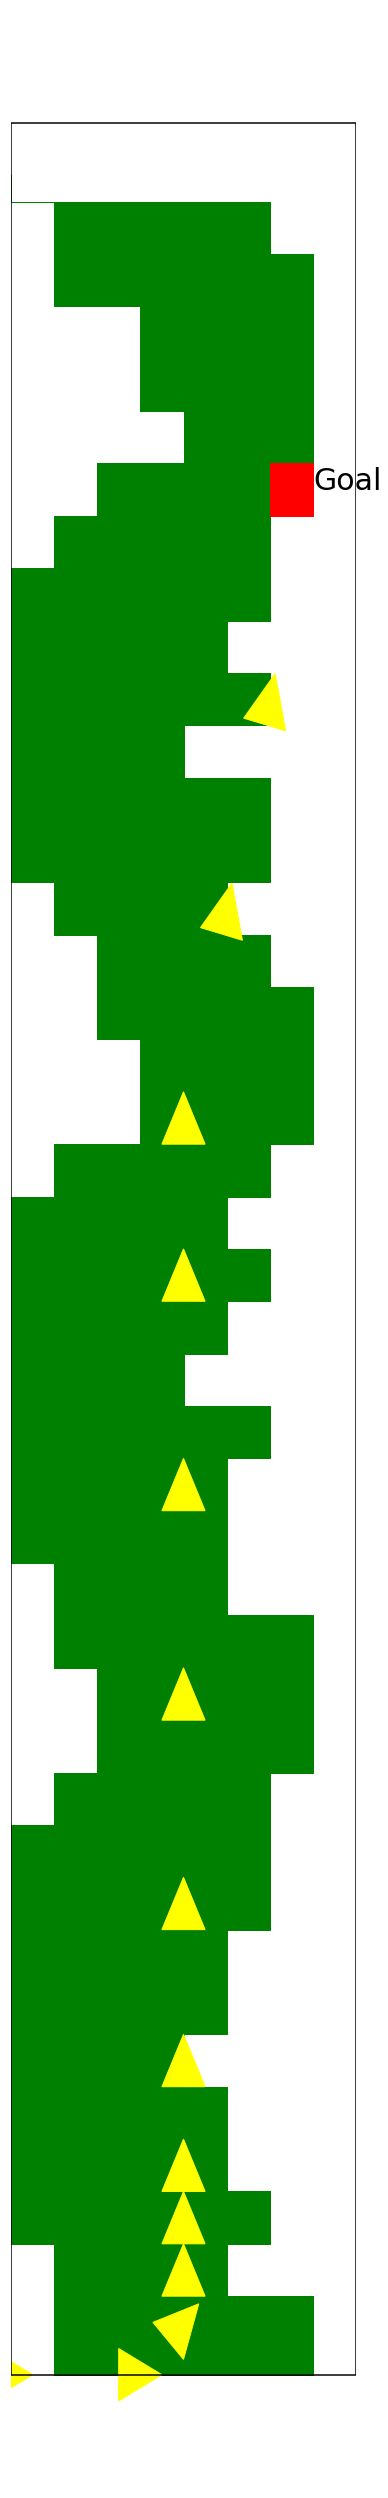

In [1999]:
m, s = determine_moves(policy_list[-1], starting_pos=(0, 3
                                                        ), racetrack=racetrack)

In [663]:
len(policy_list)

1000

In [81]:
m

[[((0, 0), (0, 0)), (1, 1)],
 [((1, 1), (1, 1)), (0, 0)],
 [((2, 2), (1, 1)), (0, -1)],
 [((3, 2), (1, 0)), (1, 0)],
 [((5, 2), (2, 0)), (1, 0)]]

In [78]:
def display_position(rt, pos):
    rt = rt.copy()
    rt[pos] = 9
    return np.flip(rt, axis=0)

# Using Gym

In [1721]:
k = 1e8
np.arange(k).dot(np.arange(k)).dot(np.arange())

3.333333283333379e+23

In [1693]:
import vispy

In [1697]:
from pyglet.gl import *

In [1712]:
import gym
env = gym.make('Pong-v0')
done = False
env.reset()
while not done:
    _, _, done, _ = env.step(env.action_space.sample())
    env.render()
env.close()

In [1709]:
!pip install gym[atari]

  Using cached https://files.pythonhosted.org/packages/8f/ba/1d22e9d2f332f07aaa57041f5dd569c2cb40a92bd6374a0b743ec3dfae97/atari_py-0.2.6-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/44/35/6db0fa2e644922533ddc2a3c41d1a86dabefce89d9db85ec31dcc69dc2e3/opencv_python-4.1.1.26-cp37-cp37m-manylinux1_x86_64.whl
